In [1]:
import numpy as np
from matplotlib import pyplot as plt

## meshgrid (3 차원 자료의 2 차원 공간 표현)

- 입력 변수가 x, y 두 개이고 출력 변수가 z 하나인 경우에는 3차원 자료가 됨   


- 3차원 자료를 2차원 평면에 시각화하는 방법 


    - 색(color)로 구분  
    - 입력 변수 x, y는 그대로 사용할 수 없고 meshgrid 명령으로 `그리드 포인트 행렬`을 만들어야 함
    

- meshgrid : coordinate vector 를 이용하여 coordinate matrix 구성

<img src="meshgrid.png" width="600">

In [2]:
x = np.array([1, 2, 3, 4])
y = np.array([7, 6, 5])

XX, YY = np.meshgrid(x, y)
print("XX : \n", XX)
print()
print("YY : \n", YY)

XX : 
 [[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]

YY : 
 [[7 7 7 7]
 [6 6 6 6]
 [5 5 5 5]]


## meshgrid 를 이용한 x, y 의 조합
```
x = [0, 1, 2]
y = [0, 1, 2]

X1= [[0 1 2]
     [0 1 2]
     [0 1 2]]
x2= [[0 0 0]
     [1 1 1]
     [2 2 2]]
```
<img src="meshgrid1.png" width="250">

In [3]:
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])
X1, X2 = np.meshgrid(x, y)
print(X1)
print(X2)
print()
print("X1, X2의 조합")
for i in range(len(X1)):
    for x, y in zip(X1[i], X2[i]):
        print((x, y))

[[0 1 2]
 [0 1 2]
 [0 1 2]]
[[0 0 0]
 [1 1 1]
 [2 2 2]]

X1, X2의 조합
(0, 0)
(1, 0)
(2, 0)
(0, 1)
(1, 1)
(2, 1)
(0, 2)
(1, 2)
(2, 2)


In [4]:
XX = np.column_stack([X1.ravel(), X2.ravel()])
print(XX.shape)
XX[:10]

(9, 2)


array([[0, 0],
       [1, 0],
       [2, 0],
       [0, 1],
       [1, 1],
       [2, 1],
       [0, 2],
       [1, 2],
       [2, 2]])

In [5]:
Y = XX[:, 0] + XX[:, 1]
Y.shape

(9,)

<IPython.core.display.Javascript object>


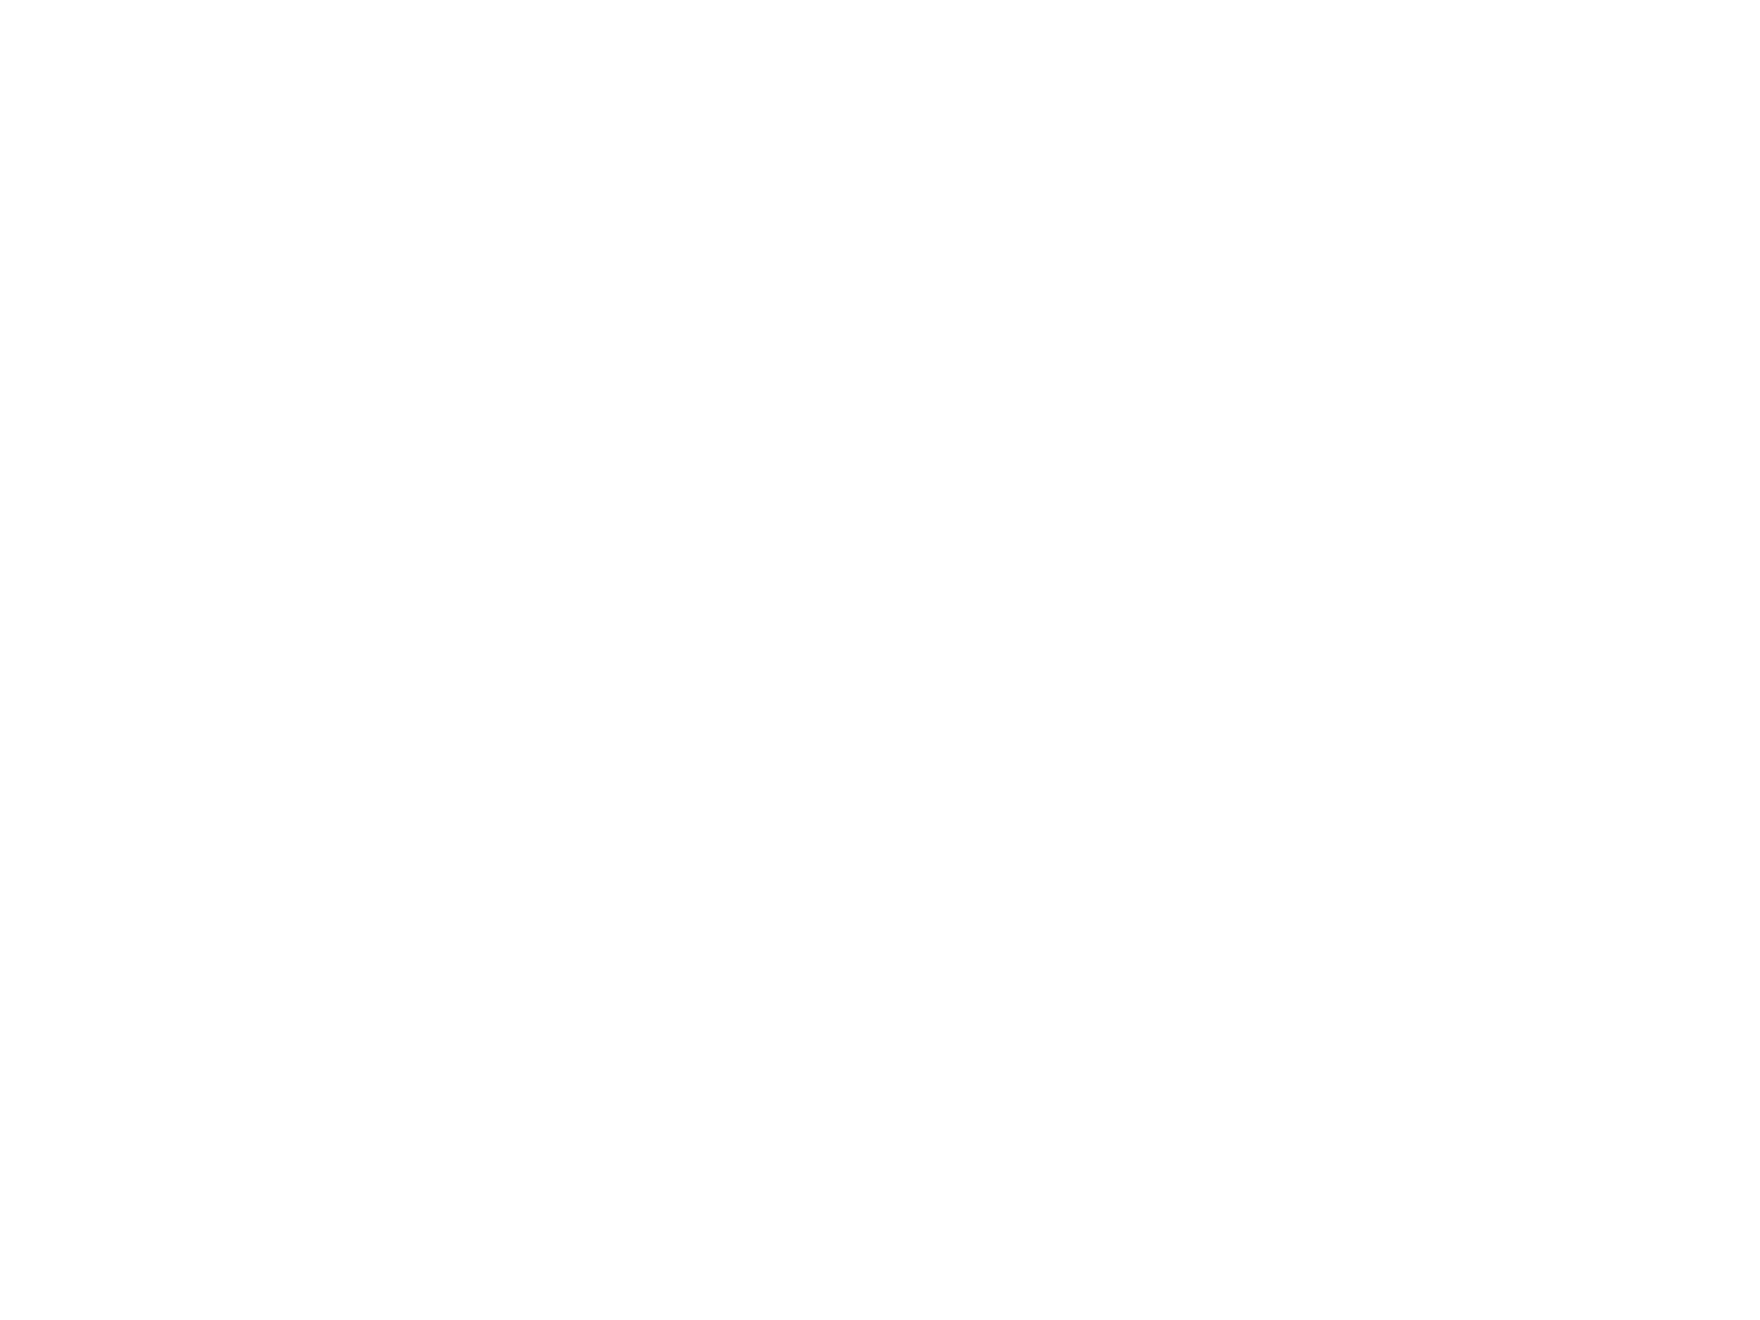

In [6]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1, X2, Y, c='blue', marker='o')
ax.plot_surface(X1, X2, Y.reshape(X1.shape), color='y', alpha=0.3)

ax.set_xlabel('bmi')
ax.set_ylabel('bp')
ax.set_zlabel('progress')
plt.show()

## 시각화를 통한 결정 경계 표시

- `matplotlib.pyplot.pcolormesh(X, Y, C, cmap=)`  
    - 직사각형 그리드로 색상 플롯을 생성합니다.
    - X: x 좌표  
    - Y: y 좌표  
    - C: color mapping 될 value
    
<img src="pcolormesh.png" width="400">

### 이진 분류의 결정 경계 표시

In [7]:
from matplotlib.colors import ListedColormap
# color map 생성
cmap= ListedColormap(['#FFAAAA', '#AAFFAA'])   

In [8]:
# simple 이진 분류
Y = (XX[:, 0] + XX[:, 1] > 2)
Y

array([False, False, False, False, False,  True, False,  True,  True])

- Y 가 0, 1 인 결정 경계 표시
- 실제 data 표시

Text(0.5, 1.0, 'meshgrid + pcolormesh')

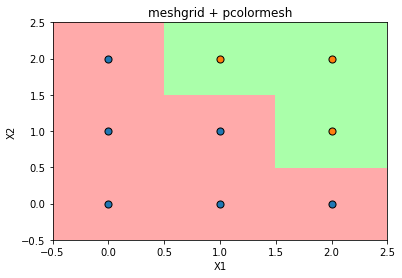

In [9]:
%matplotlib inline
# 결정경계 표시
plt.pcolormesh(X1, X2, Y.reshape(X1.shape), cmap=cmap, shading='auto')    
# real data
for i in range(2):
    plt.scatter(XX[:,0][Y == i], XX[:,1][Y == i], s=50, edgecolor='k')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('meshgrid + pcolormesh')